## Final Project Submission

Please fill out:
* Student name: Felix Nyagah
* Student pace:full time
* Scheduled project review date/time:Friday 26 August 2022 
* Instructor name: Antonny 
* Blog post URL:


BOX OFFICE MOVIES ANALYSIS

                                          BUSINESS UNDERSTANDING

I am charged with exploring what type of films are currently doing the best at the box office.The goal of the project would be to find which movie sales are high and the relationship between genre and the sales,the relationship between between the sales and the gender watching the movie and the relationship between tha age and the movie sold and the gross profit for the movies.Most business look at the return on investment which is the proportion of initial cash outlay that returns as earnigs from the sale of movies or granting movie rights to studios or theatres worldwide or domestically.

                                           DATA UNDERSTANDING

In [199]:
#import libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm
%matplotlib inline

                              bom_movie_details

In [55]:
bom_movie_details = pd.read_csv('bom.movie_gross.csv')
bom_movie_details.head()    

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [49]:
bom_movie_details.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [56]:
bom_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [171]:
bom_movie_details.describe()

,domestic_gross,year
count,3359.00,3387.00
mean,28745845.07,2013.96
std,66982498.24,2.48
min,100.00,2010.00
25%,120000.00,2012.00
50%,1400000.00,2014.00
75%,27900000.00,2016.00
max,936700000.00,2018.00


                            #imd database

In [29]:
conn = sqlite3.connect('im.db')

In [31]:
pd.read_sql("""
SELECT name
FROM sqlite_master 
WHERE type = 'table';
""",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [152]:
im_movie_basics = pd.read_sql("""
                              SELECT*
                              FROM movie_basics;
                              """,conn)
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [89]:
im_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [90]:
im_movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [216]:
im_movie_ratings= pd.read_sql("""
                              SELECT*
                              FROM movie_ratings;
                              """,conn)
im_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8,31
1,tt10384606,9,559
2,tt1042974,6,20
3,tt1043726,4,50352
4,tt1060240,6,21


In [58]:
im_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [170]:
im_movie_ratings.describe()

,averagerating,numvotes
count,73856.00,73856.00
mean,6.33,3523.66
std,1.47,30294.02
min,1.00,5.00
25%,5.50,14.00
50%,6.50,49.00
75%,7.40,282.00
max,10.00,1841066.00


In [175]:
tn_movie_budget = pd.read_csv('tn.movie_budgets.csv')
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [60]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [176]:
tn_movie_budget['production_budget']=tn_movie_budget['production_budget'].str.replace('$','')
tn_movie_budget['domestic_gross']=tn_movie_budget['domestic_gross'].str.replace('$','')
tn_movie_budget['worldwide_gross']=tn_movie_budget['worldwide_gross'].str.replace('$','')

tn_movie_budget['production_budget']=tn_movie_budget['production_budget'].str.replace(',','')
tn_movie_budget['domestic_gross']=tn_movie_budget['domestic_gross'].str.replace(',','')
tn_movie_budget['worldwide_gross']=tn_movie_budget['worldwide_gross'].str.replace(',','')
tn_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [177]:
tn_movie_budget['production_budget']=tn_movie_budget['production_budget'].astype(int)
tn_movie_budget['domestic_gross']=tn_movie_budget['domestic_gross'].astype(int)
tn_movie_budget['id']=tn_movie_budget['id'].astype(str)
tn_movie_budget['worldwide_gross']=tn_movie_budget['worldwide_gross'].astype(np.int64)

In [87]:
tn_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   object
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


In [233]:

tn_movie_budget['total_gross']=tn_movie_budget['domestic_gross']+tn_movie_budget['worldwide_gross']
tn_movie_budget['net_return']=tn_movie_budget['total_gross']-tn_movie_budget['production_budget']
tn_movie_budget['return_on_investment']=tn_movie_budget['net_return']/tn_movie_budget['production_budget']*100

In [234]:
tn_movie_budget.describe()

,production_budget,domestic_gross,worldwide_gross,total gross,total_gross,net_return,return_on_investment
count,5782,5782,5782,5782,5782,5782,5782
mean,31587757,41873327,91487461,133360788,133360788,101773031,678
std,41812077,68240597,174719969,239941100,239941100,210887978,5492
min,1100,0,0,0,0,-157475300,-100
25%,5000000,1429534,4125415,6448924,6448924,-309822,-20
50%,17000000,17225945,27984448,46058546,46058546,24995378,166
75%,40000000,52348662,97645836,150693737,150693737,111164788,489
max,425000000,936662225,2776345279,3536852904,3536852904,3111852904,359900


                                           DATA PREPARATION

In [93]:
# checking for null values
bom_movie_details.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [97]:
# checking for unique values
bom_movie_details.nunique()

title             3386
studio             257
domestic_gross    1797
foreign_gross     1204
year                 9
dtype: int64

In [205]:
# There is no missing values
tn_movie_budget.isnull().sum()

id                      0
release_date            0
movie                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
total gross             0
total_gross             0
net_return              0
return_on_investment    0
dtype: int64

In [213]:
# checking for unique values
tn_movie_budget.nunique()

id                       100
release_date            2418
movie                   5698
production_budget        509
domestic_gross          5164
worldwide_gross         5356
total gross             5363
total_gross             5363
net_return              5497
return_on_investment    5402
dtype: int64

In [214]:
#checking for duplicates
len(tn_movie_budget[tn_movie_budget.duplicated()])

0

In [220]:
# checking for missing values
im_movie_basics.isnull().sum()
#There are is missing values

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [143]:
#checking for unique values
im_movie_basics.nunique()


movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [142]:
#there is no duplicates
imduplicates=im_movie_basics[im_movie_basics.duplicated()]
len(imduplicates)

0

In [138]:
#there is no missing values in im_movie_ratings 
im_movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [134]:
#checking for unique values
im_movie_ratings.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

In [137]:
#checking for duplicates
#there are no duplicates
len(im_movie_ratings[im_movie_ratings.duplicated(subset='movie_id')])

0

In [223]:
im_movie_basic_rating =pd.read_sql("""
                                   SELECT *
                                    FROM movie_basics
                                    JOIN movie_ratings
                                    USING (movie_id);
                                    """,conn)
im_movie_basic_rating

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,7,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75,Documentary,6,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98,"Drama,Family",9,136
73853,tt9914642,Albatross,Albatross,2017,nan,Documentary,8,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,nan,None,7,5


In [232]:
im_movie_basic_rating['runtime_minutes']=im_movie_basic_rating['runtime_minutes'].fillna(im_movie_basics['runtime_minutes'].median())
im_movie_basic_rating['genres']=im_movie_basic_rating['genres'].fillna('nan')
im_movie_basic_rating['original_title']=im_movie_basic_rating['original_title'].fillna(im_movie_basic_rating['primary_title'])

                                                  DATA CLEANING

In [157]:
#filling missing values of the im_mvie_basics
im_movie_basics['runtime_minutes']=im_movie_basics['runtime_minutes'].fillna(im_movie_basics['runtime_minutes'].median())
im_movie_basics['genres']=im_movie_basics['genres'].fillna('nan')
im_movie_basics['original_title']=im_movie_basics['original_title'].fillna(im_movie_basics['primary_title'])

In [158]:
#checking if there are still missing values
im_movie_basics.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

                                                 DATA ANALYSIS

(a) Univariate

In [182]:
pd.options.display.float_format = '{:.0f}'.format

                              Central Tendencies

In [235]:
#mean
print('The mean of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].mean()))
print('The mean of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].mean()))
print('The mean of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].mean()))
print('The mean of the total_gross in dollars is '+ str(tn_movie_budget['total_gross'].mean()))
print('The mean of the net_return in dollars is '+ str(tn_movie_budget['net_return'].mean()))
print('The mean of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].mean()))
print('The mean of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].mean()))
print('The mean of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].mean()))
                                

The mean of the production budget in dollars is 31587757.0965064
The mean of the domestic_gross in dollars is 41873326.867001034
The mean of the worldwide_gross in dollars is 91487460.90643376
The mean of the total_gross in dollars is 133360787.7734348
The mean of the net_return in dollars is 101773030.6769284
The mean of the return_on_investment in dollars is 678.3701579533066
The mean of the runtime_minutes in minutes is 93.86434412911612
The mean of the averagerating  is 6.332728552859619


In [236]:
#median
print('the median of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].median()))
print('the median of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].median()))
print('the median of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].median()))
print('The median of the net_return in dollars is '+ str(tn_movie_budget['net_return'].median()))
print('The median of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].median()))
print('The median of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].median()))
print('The median of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].median()))
                                

the median of the production budget in dollars is 17000000.0
the median of the domestic_gross in dollars is 17225945.0
the median of the worldwide_gross in dollars is 27984448.5
The median of the net_return in dollars is 24995377.5
The median of the return_on_investment in dollars is 165.93148192982457
The median of the runtime_minutes in minutes is 90.0
The median of the averagerating  is 6.5


In [238]:
#mode
print('the mode of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].mode()))
print('the mode of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].mode()))
print('the mode of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].mode()))
print('The mode of the net_return in dollars is '+ str(tn_movie_budget['net_return'].mode()))
print('The mode of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].mode()))
print('The mode of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].mode()))
print('The mode of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].mode()))
#Most occuring movies  production budget is 20000000 dollars
#Most occuring domestic gross is zero dollars
#Most studios make a net loss of 1000000
#Most movies make negative return of investment of -100% ie they loose all their money
#Most movies have an average rating of 7

the mode of the production budget in dollars is 0    20000000
dtype: int32
the mode of the domestic_gross in dollars is 0    0
dtype: int32
the mode of the worldwide_gross in dollars is 0    0
dtype: int64
The mode of the net_return in dollars is 0   -1000000
dtype: int64
The mode of the return_on_investment in dollars is 0   -100
dtype: float64
The mode of the runtime_minutes in minutes is 0   87
dtype: float64
The mode of the averagerating  is 0   7
dtype: float64


In [190]:
#range
print('the range of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].max()-tn_movie_budget['production_budget'].min()))
print('the range of the domestic_gross in dollars is '+ str((tn_movie_budget['domestic_gross'].max())-tn_movie_budget['domestic_gross'].min()))
print('the range of the worldwide_gross in dollars is '+ str((tn_movie_budget['worldwide_gross'].max())-tn_movie_budget['domestic_gross'].min()))
print('The mean of the net_return in dollars is '+ str(tn_movie_budget['net_return'].mean()))
print('The mean of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].mean()))
print('The mean of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].mean()))
print('The mean of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].mean()))
                                

the range of the production budget in dollars is 424998900
the range of the domestic_gross in dollars is 936662225
the range of the worldwide_gross in dollars is 2776345279


In [240]:
#variance
print('the variance of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].var()))
print('the variance of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].var()))
print('the variance of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].var()))
print('The variance of the net_return in dollars is '+ str(tn_movie_budget['net_return'].var()))
print('The variance of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].var()))
print('The variance of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].var()))
print('The variance of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].var()))
                                

the variance of the production budget in dollars is 1748249768582191.8
the variance of the domestic_gross in dollars is 4656779127627114.0
the variance of the worldwide_gross in dollars is 3.052706749010146e+16
The variance of the net_return in dollars is 4.447373917270737e+16
The variance of the return_on_investment in dollars is 30164360.2418641
The variance of the runtime_minutes in minutes is 39020.1361026854
The variance of the averagerating  is 2.175561147410842


In [241]:
#skewness
print('the skeweness of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].skew()))
print('the skewness of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].skew()))
print('the skewness of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].skew()))
print('The skewness of the net_return in dollars is '+ str(tn_movie_budget['net_return'].skew()))
print('The skewness of the return_on_investment in dollars is '+ str(tn_movie_budget['return_on_investment'].skew()))
print('The skewness of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].skew()))
print('The skewness of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].skew()))
                                

the skeweness of the production budget in dollars is 2.718373312433728
the skewness of the domestic_gross in dollars is 3.7589273318288816
the skewness of the worldwide_gross in dollars is 4.4914494627865444
The skewness of the net_return in dollars is 4.478428312555265
The skewness of the return_on_investment in dollars is 50.34975028004288
The skewness of the runtime_minutes in minutes is 242.68259500291512
The skewness of the averagerating  is -0.5480197452919562


In [242]:
#kurtosis
print('the kurtosis of the production budget in dollars is '+ str(tn_movie_budget['production_budget'].kurt()))
print('the kurtosis of the domestic_gross in dollars is '+ str(tn_movie_budget['domestic_gross'].kurt()))
print('the skurtosis of the worldwide_gross in dollars is '+ str(tn_movie_budget['worldwide_gross'].kurt()))
print('The mean of the net_return in dollars is '+ str(tn_movie_budget['net_return'].kurt()))
print('The mean of the return_on_investment in percentage of dollars is '+ str(tn_movie_budget['return_on_investment'].kurt()))
print('The mean of the runtime_minutes in minutes is '+ str(im_movie_basic_rating['runtime_minutes'].kurt()))
print('The mean of the averagerating  is '+ str(im_movie_basic_rating['averagerating'].kurt()))
                                

the kurtosis of the production budget in dollars is 10.285923930107748
the kurtosis of the domestic_gross in dollars is 22.41884897792375
the skurtosis of the worldwide_gross in dollars is 31.92804318445726
The mean of the net_return in dollars is 31.20432385838202
The mean of the return_on_investment in dollars is 3184.2289763241124
The mean of the runtime_minutes in minutes is 62090.4620628443
The mean of the averagerating  is 0.25584057581467157


In [245]:
#quantiles
print('the quantiles of the production budget in dollars is \n'+ str(tn_movie_budget['production_budget'].quantile([0.25,0.5,0.75])))
print('the quantiles of the domestic_gross in dollars is \n'+ str(tn_movie_budget['domestic_gross'].quantile([0.25,0.5,0.75])))
print('the quantiles of the worldwide_gross in dollars is \n'+ str(tn_movie_budget['worldwide_gross'].quantile([0.25,0.5,0.75])))
print('The quantiles of the net_return in dollars is \n'+ str(tn_movie_budget['net_return'].quantile([0.25,0.5,0.75])))
print('The quantiles of the return_on_investment in percantage of dollars is \n'+ str(tn_movie_budget['return_on_investment'].quantile([0.25,0.5,0.75])))
print('The quantiles of the runtime_minutes in minutes is \n'+ str(im_movie_basic_rating['runtime_minutes'].quantile([0.25,0.5,0.75])))
print('The quantiles of the averagerating  is \n'+ str(im_movie_basic_rating['averagerating'].quantile([0.25,0.5,0.75])))
                                

the quantiles of the production budget in dollars is 
0    5000000
0   17000000
1   40000000
Name: production_budget, dtype: float64
the quantiles of the domestic_gross in dollars is 
0    1429534
0   17225945
1   52348662
Name: domestic_gross, dtype: float64
the quantiles of the worldwide_gross in dollars is 
0    4125415
0   27984448
1   97645836
Name: worldwide_gross, dtype: float64
The quantiles of the net_return in dollars is 
0     -309822
0    24995378
1   111164788
Name: net_return, dtype: float64
The quantiles of the return_on_investment in dollars is 
0   -20
0   166
1   489
Name: return_on_investment, dtype: float64
The quantiles of the runtime_minutes in minutes is 
0    83
0    90
1   101
Name: runtime_minutes, dtype: float64
The quantiles of the averagerating  is 
0   6
0   6
1   7
Name: averagerating, dtype: float64


C:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lzdi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

<AxesSubplot:xlabel='return_on_investment', ylabel='Density'>

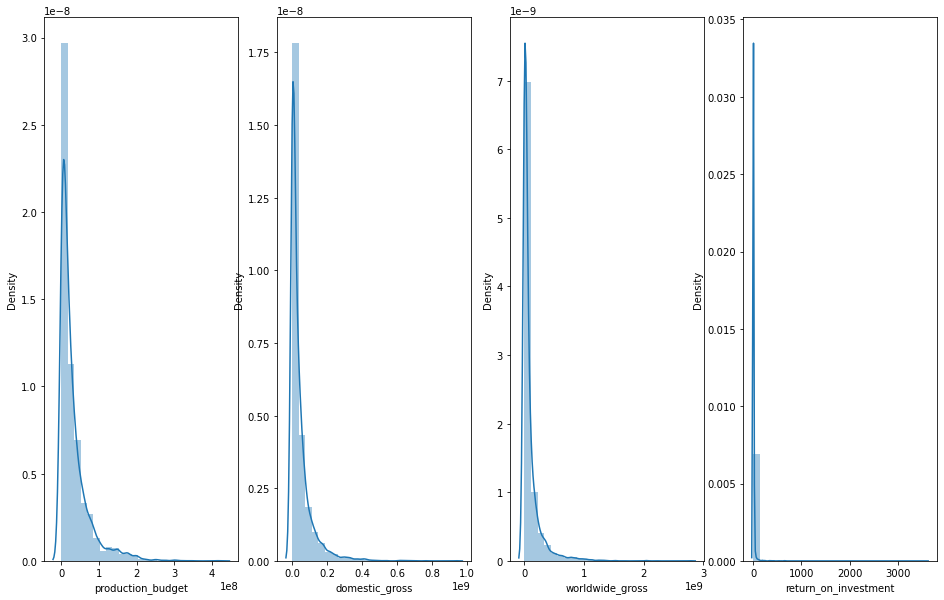

In [211]:
#checking the distribution of the data
n_bins = 25

fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize= (16,10))

sns.distplot(tn_movie_budget['production_budget'], ax=ax1, bins= n_bins)
sns.distplot(tn_movie_budget['domestic_gross'], ax=ax2, bins= n_bins)
sns.distplot(tn_movie_budget['worldwide_gross'], ax=ax3, bins= n_bins)
sns.distplot(tn_movie_budget['return_on_investment'], ax=ax4, bins= n_bins)
#the data is positively skewed for all

(b)Bivariate

In [224]:
!git commit -m"edit"

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   student.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [247]:
!git add .

In [228]:
!git commit -m"edit"

[master 5dcf718] edit
 1 file changed, 698 insertions(+), 315 deletions(-)


In [246]:
!git push https://github.com/felix-n12/dsc-phase-1-project-v2-4 master

fatal: protocol ''https' is not supported
